# Lesson - Machine Learning VII:Linear Algebra for Machine Learning
In this lesson, we'll explore the framework of linear algebra, which provides a way to represent and understand the solutions to **systems of linear equations**. A system of linear equations consists of multiple, related functions with a common set of variables. The word **linear equation** is often used interchangeably with **linear function**. Many real world processes can be modeled using multiple, related linear equations. We'll start by exploring a concrete example of a linear system, another word for system of linear equations,

-----

## Sec-1 - Linear Systems
**Overview -  Optimal Salary Problem**

we have to pick between 2 different job offers. The first job offer has a base weekly salary of 1000 dollars and pays 30 dollars an hour. We can represent this offer as y=1000+30x, where y represents dollars earned that week and x represents hours worked that week. The second job offer has a base weekly salary of 100 dollars and pays 50 dollars an hour. We can represent this offer as y=100+50x, where y also represents dollars earned that week and x also represents hours worked that week.

We want to understand which job offer is better. If we know exactly the amount of money we'd like to make each week (y), we can substitute that value into both equations and solve for x to identify which job will require us to work less hours. If we know exactly the number of hours we want to work each week (x), we can substitute that value into both equations and solve for y to identify which job will make us more money for the same amount of hours worked.

nstead, if we want to understand:

- At what number of hours worked can we expect to make the same amount of money at either job?
- How many hours do we have to work to make more money at the first job than the second job?

To answer the first question, we need to find the x value where both the y values are equivalent. Once we know where they intersect, we can easily find out the answer to the second question.

**Exercise**

- Use `numpy.linspace()` to generate 1000, evenly spaced values between 0 and 50 and assign to `x`.
- Transform `x` using the equation `y=30x+1000` and assign the result to `y1`.
- Transform `x` using the equation `y=50x+100` and assign the result to `y2`.
- Generate 2 line plots on the same subplot:
    - One with x on the x-axis and y1 on the y-axis. Set the line color to "orange".
    - One with x on the x-axis and y2 on the y-axis. Set the line color to "blue".
    - Skip selecting a value range for the x and y axes, and instead let matplotlib automatically select based on the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Setting pandas display options for large data
pd.options.display.max_rows = 200
pd.options.display.max_columns = 150

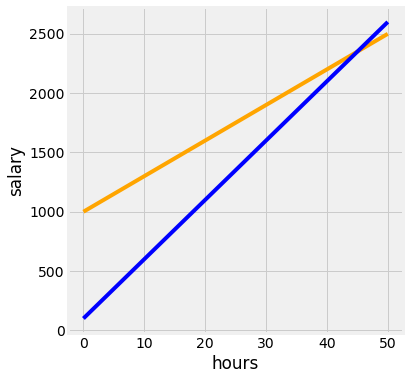

In [2]:
x = np.linspace(0, 50, 1000)
y1 = 30*x + 1000
y2 = 50*x + 100

fig = plt.figure(figsize=(6, 6))
plt.style.use('fivethirtyeight')
plt.plot(x, y1, color = 'orange')
plt.plot(x, y2, color = 'blue')
plt.xlabel("hours") 
plt.ylabel('salary')
plt.show()

### Solving Linear Systems by Elimination

From the plot we generated above, we can tell that both functions intersect at somewhere near the point (45,2200). This point where both equations intersect is known as a **solution** to the system, because substituting for x and y into both functions in the system makes both of them true. Said another way, plugging in the x value of the solution into both functions yields the same y value.

Because both functions share the same variables, we can represent one of the variables, say y, in terms of the other variable and solve for the x value. Then, we can substitute this x value into either equation to determine the y value. This process is known as **solving by elimination** or the **elimination method**.

First, we'll substitute y in the second function with the first function:
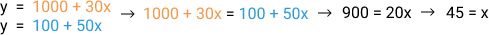

Note that order isn't important and we could have also substituted y in the first function with the second function. Now that we know that x=45, we can substitute this into either equation to determine y.

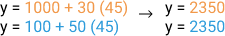

While we can solve a linear system like this by hand using arithmetic, we can't use the same technique to solve much more complex systems. Many real world systems are modeled using many more than 2 variables and functions and solving by hand is unfeasible. Those types of systems can be solved using linear algebra using a variation of arithmetic elimination called **Gaussian elimination**. 

### Representing Function in General Form

Linear algebra provides a way to represent a linear system compactly, known as a matrix, and a set of rules for manipulating that representation, also known as an algebra. A matrix uses rows and columns to represent only the coefficients in a linear system and it's similar to the way data is represented in a spreadsheet or a dataframe. Before we can represent our system in a matrix, we need to rearrange each of our functions into the general form.

Previously, we primarily explored linear functions in slope-intercept form:
$$y = mx + b$$

In linear algebra, we usually represent linear functions in the general form:

$$Ax + By = c$$

In the general form, the variables and their coefficients are on the left side, while the constant term is on the right side. We can switch from point-slope form to the general form by rearranging the terms:
$$mx - y  = - b$$

Here's what the first function looks like in general form:
$$30x - y = -1000$$
Here's what the second function looks like in general form:
$$50x - y = -100$$

To represent both linear functions in a system, we use an **augmented matrix**:

$$\left[\begin{array}{rr|r}
30 & -1 & -1000 \\ 
50 & -1 & -100
\end{array}\right]$$

In an augmented matrix, the coefficients from the left sides of the functions are on the left side of the bar (`|`), while the constants from the right sides of the functions are on the right side. An augmented matrix allows us to represent a linear system using just the real number coefficients and constants.

Here's a summary of the 3 different representations of the linear system we just discussed:
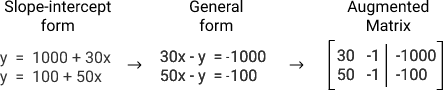

### Representing an Augmented Matrix in Numpy

To represent an augmented matrix, we can use the `numpy.asarray()` [function](https://numpy.org/doc/stable/reference/generated/numpy.asarray.html) and pass in each row as a list, from the top row to the bottom row. The following code represents a 2 row by 3 column matrix containing all 0's. Because we'll be performing addition, subtraction, multiplication, and division operations using the values in this matrix, we need to set the type to float32 to preserve precision.

In [3]:
matrix_zero = np.asarray([
    [0, 0, 0],
    [0, 0, 0]  
], dtype = np.float32)
matrix_zero

array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

**Exercise**

- Create a NumPy 2D array representation of our augmented matrix:
$$\left[\begin{array}{rr|r}
30 & -1 & -1000 \\ 
50 & -1 & -100
\end{array}\right]$$

- Assign the resulting numpy.ndarray object to `matrix_one`.

In [4]:
matrix_one = np.asarray([
    [30, -1, -1000],
    [50, -1, -100]
], dtype = np.float32)
matrix_one

array([[   30.,    -1., -1000.],
       [   50.,    -1.,  -100.]], dtype=float32)

### Matrix Representation of the Solution

The important question now is, how do we arrive at the same solution we did earlier by arithmetic? Earlier, we used arithmetic to calculate the solution to the system and represented it as a coordinate pair: (45,2350). Here's how we represent the solution when we're working with the matrix representation:
$$\left[\begin{array}{rr|r}
1 & 0 & 45 \\ 
0 & 1 & 2350
\end{array}\right]$$

When we convert this matrix back into equations in the standard form, we'll notice that this corresponds to the same solution:

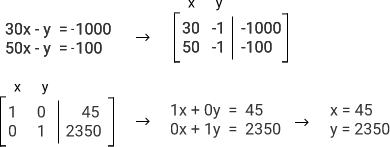

To solve a linear system, we need to perform a series of transformations to try to evolve the matrix into this form (where the solution is presented). Not all linear systems have solutions, however.

### Row Operations

To preserve the relationships in the linear system, we can only use the following row operations:

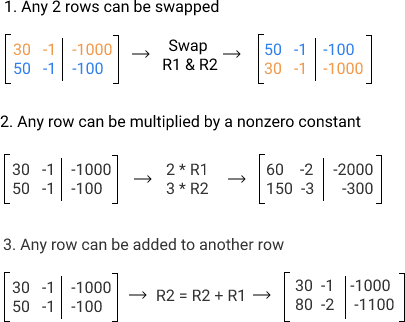

While these may seem new, these row operations are the same allowed operations we can perform when the functions are in equation form.

**Row Operations in Numpy**

- To swap 2 rows in a NumPy ndarray object, we need to use double bracket notation to specify the row ordering change:

In [5]:
matrix =  np.asarray([
    [1, 3],
    [50, 2]  
], dtype=np.float32)
# Swap the second row (at index value 1) with the first row (at index value 0).
matrix = matrix[[1,0]]
matrix

array([[50.,  2.],
       [ 1.,  3.]], dtype=float32)

- To multiply a row by a nonzero constant, we select the row, use the * operator to multiply all of the values by a scalar value, and then assign the transformed row back:

In [6]:
# Multipy the second row by 2.
matrix[1] = 2*matrix[1]
matrix

array([[50.,  2.],
       [ 2.,  6.]], dtype=float32)

- To add one row to another row, we need to add both rows then assign it back to the row we want to overwrite:

In [7]:
# Add the second row to the first row.
matrix[1] = matrix[1] + matrix[0]
matrix

array([[50.,  2.],
       [52.,  8.]], dtype=float32)

Lastly, we can combine and chain these rules to perform more complex row transformations:

**Note that you can't multiply or divide by other rows**.

In [8]:
matrix[1] = 0.5*matrix[0] + matrix[1] + matrix[0]
matrix

array([[ 50.,   2.],
       [127.,  11.]], dtype=float32)

You can divide or multiply a row with a scalar.

In [9]:
# Divide the first row from matrix_one by 30.

matrix_one = np.asarray([
    [30, -1, -500],
    [50, -1, -100]  
], dtype=np.float32)

matrix_one[0] = matrix_one[0] / 30

matrix_one

array([[ 1.0000000e+00, -3.3333335e-02, -1.6666666e+01],
       [ 5.0000000e+01, -1.0000000e+00, -1.0000000e+02]], dtype=float32)

### Simplifying Matrix to Echelon Form and thus Solving it

In order to solve the matrix, we will have to reduce it to the echelon form. In this form, the values on the diagonal locations are all equal to 1 and the values below the diagonal are all equal to 0.
$$\left[\begin{array}{rr|r}
1 & ? & ? \\ 
0 & 1 & ?
\end{array}\right]$$

In [10]:
matrix_three = np.asarray([
    [30, -1, -1000],
    [50, -1, -100]
], dtype = np.float32)

# First divide first (equation) row by 30 so that the diagonal value on the first row becomes 1:
matrix_three[0] = matrix_three[0] / 30
# Then, subtract 50 times the first row from the second row, so that the value below diagonal on the 2nd row becomes 1:
matrix_three[1] = matrix_three[1] - 50*matrix_three[0]

matrix_three



array([[ 1.0000000e+00, -3.3333335e-02, -3.3333332e+01],
       [ 0.0000000e+00,  6.6666675e-01,  1.5666666e+03]], dtype=float32)

Next step is to rearrange the matrix into row reduced echelon form. This is the form that we mentioned earlier where the solution is exposed to us:
$$\left[\begin{array}{rr|r}
1 & 0 & ? \\ 
0 & 1 & ?
\end{array}\right]$$

The two question marks (?), which we still need to determine, represent the x and y values that solve our system. In the above step, we brought the matrix one transformation away from row reduced echelon form:

In [11]:
# multiply row 2 with 30/20 so as to bring diagonal on 2nd row also to 1

matrix_three[1] = (30/20) * matrix_three[1]
matrix_three

array([[ 1.0000000e+00, -3.3333335e-02, -3.3333332e+01],
       [ 0.0000000e+00,  1.0000001e+00,  2.3500000e+03]], dtype=float32)

In [12]:

# Finally divide 2nd row by 30 and add to 1st row to make the 2nd element of row 1 to 0
matrix_three[0] = matrix_three[0] + matrix_three[1]/30
matrix_three

array([[1.0000000e+00, 3.7252903e-09, 4.5000004e+01],
       [0.0000000e+00, 1.0000001e+00, 2.3500000e+03]], dtype=float32)

**Note the value above in row 1 ~ 0**

### Conclusion

In most real world situations, the dependent variable y is connected to multiple independent variables, not just a single one x. To represent those functions, we'll need to work with a different version of the general form:

$$a_1x_1 + a_2x_2 + a_3x_3 + ... + a_nx_n = c$$

In this form, a1...an are the coefficients and c is a constant value.

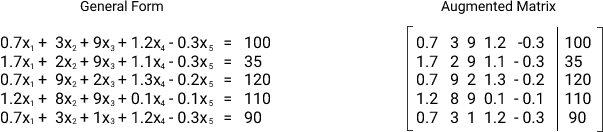

If we have a system with more than 3 variables, we can't visualize it easily. In addition, performing Gaussian elimination becomes much more painful to do.

------

## Sec-2 - Vectors

Above, we learned how to use an augmented matrix and the row operations that preserve the relationships in a system to solve a system of linear functions. At its core, a matrix is a way to represent a table of numbers. All of the matrices we worked with in the last mission contained 2 rows and 3 columns. Here's the first one that setup our linear system:

$$\left[\begin{array}{rr|r}
30 & -1 & -1000 \\ 
50 & -1 & -100
\end{array}\right]$$

This is known as a 2x3 matrix (pronounced "two by three matrix"). The convention in linear algebra is to specify the number of rows first (2) then the number of columns (3).

Each of the rows and columns in this matrix is represented as a list of numbers. A list of numbers is known as a vector. A row from a matrix is known as a row vector, while a column is known as a column vector. Here are the row vectors from the matrix:

$$\begin{bmatrix}
30 & -1 & -1000 \\ 
\end{bmatrix}$$

$$\begin{bmatrix}
50 & -1 & -100
\end{bmatrix}$$

Here are the column vectors from the matrix:
$$\begin{bmatrix}
30\\ 
50\\ 
\end{bmatrix}$$

$$\begin{bmatrix}
-1\\ 
-1\\ 
\end{bmatrix}$$

$$\begin{bmatrix}
-1000\\ 
-100\\ 
\end{bmatrix}$$

Generally, the word vector refers to the column vector (ordered list of elements in a single column) and we'll refer to the column vector that way.

### Geometric Representation of Vectors

Whenever a vector contains 2 or 3 elements, we can visualize it on a coordinate grid. Typically, a vector is visualized on a coordinate grid using arrows, not using coordinates. For a vector containing two elements, the first value describes the x coordinate while the second value describes the y coordinate. Vectors are usually drawn from the origin (0,0) to the point described by the vector:

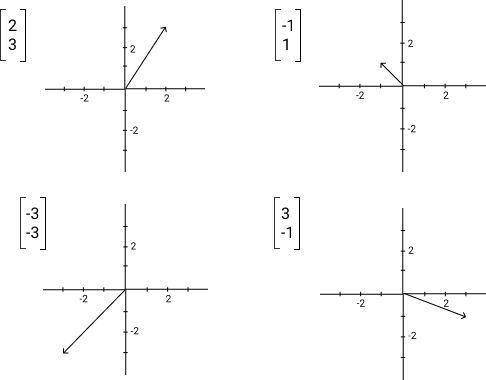


Arrows are used to visualize individual vectors because they emphasize the 2 key properties of a vector -- direction and magnitude. The direction of a vector describes the way its pointing while the magnitude describes its length. In the following diagram, are examples of 2 vectors with the same direction but different magnitude and 2 examples of vectors with the same magnitude but different direction.

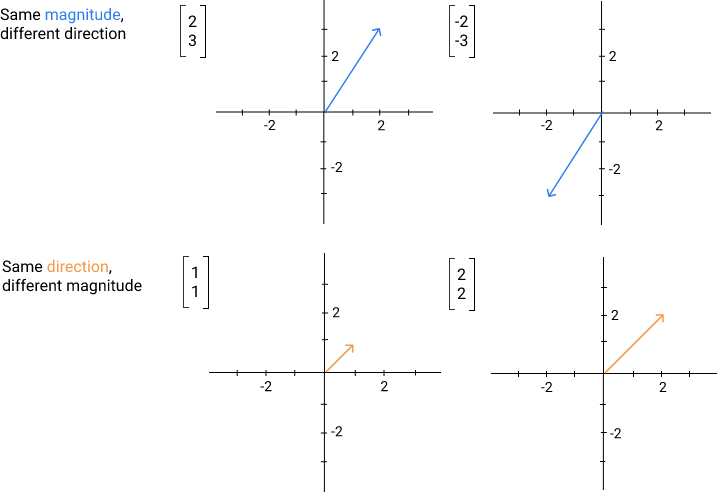

We can visualize vectors in `matplotlib` using the `pyplot.quiver(` [function](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.quiver). This function has 4 required parameters: X, Y, U, V. X and Y correspond to the (x,y) coordinates we want the vector to start at and U and V correspond to the (x,y) coordinates we want the vector to end at. The following code generates an arrow, representing a vector, from (0,0) to (1,2). The following code generates an arrow, representing a vector, from (0,0) to (1,2):

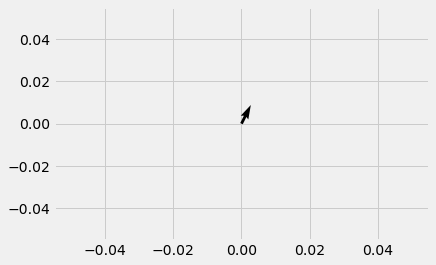

In [13]:
plt.quiver(0, 0, 1, 2)

We also need to set the `angles` and `scale_units` parameters to `xy` and the `scale parameter` to 1. Setting `angles` to 'xy' lets matplotlib know we want the angle of the vector to be between the points we specified. The `scale_units` and `scale`parameters lets us specify custom scaling parameters for the vectors. When plotting vectors, we always want to use these 3 values for the parameters. We can also set the color of each vector using the color parameter and passing in a string. 

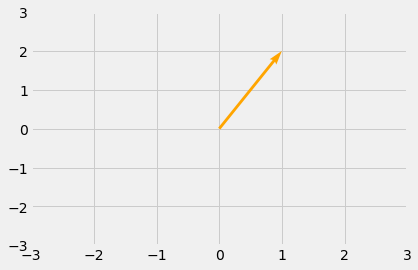

In [14]:
fig = plt.figure(figsize=(6, 4))
plt.quiver(0, 0, 1, 2, angles='xy', scale_units='xy', scale=1, color = 'orange')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

Below, we will generate 4 vectors as depicted in diagram below on a single plot:
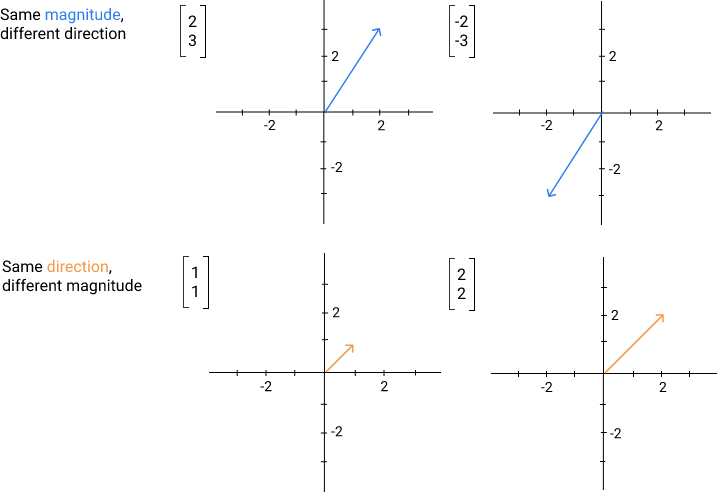



**Exercise**

- draw the x and y axes.
- Generate a vector from $[0,0]$ to $[2,3]$ and set its color to 'blue'.
- Generate a vector from $[0,0]$ to $[-2,-3]$ and set its color to 'blue'.
- Generate a vector from $[0,0]$ to $[1,1]$ and set its color to 'gold'.
- Generate a vector from $[0,0]$ to $[2,2]$ and set its color to 'gold'.

<function matplotlib.pyplot.show(*args, **kw)>

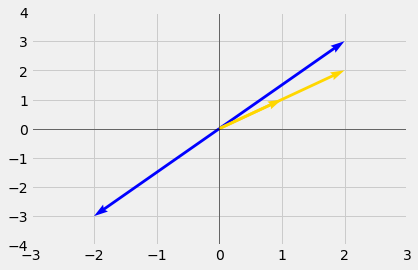

In [15]:
# draw x and y axes
fig = plt.figure(figsize=(6, 4))
plt.axhline(0, c='black', lw=0.5)
plt.axvline(0, c='black', lw=0.5)
plt.xlim(-3,3)
plt.ylim(-4,4)
# generate vectors
plt.quiver(0, 0, 2, 3, angles='xy', scale_units='xy', scale=1, color = 'blue')
plt.quiver(0, 0, -2, -3, angles='xy', scale_units='xy', scale=1, color = 'blue')
plt.quiver(0, 0, 1, 1, angles='xy', scale_units='xy', scale=1, color = 'gold')
plt.quiver(0, 0, 2, 2, angles='xy', scale_units='xy', scale=1, color = 'gold')
plt.show


### Vector Operations
Like the rows in a matrix, vectors can be added and subtracted together. When we add or subtract vectors, elements in the same position are added or subtracted and a new vector is created. Here's an example of 2 vectors being added:

$$\begin{bmatrix}
3\\ 
1
\end{bmatrix} + \begin{bmatrix}
1\\ 
2
\end{bmatrix} = 
\begin{bmatrix}
4\\ 
3
\end{bmatrix}$$

To visualize vector addition, we need to connect the vectors together instead of having all of the vectors originate at (0,0). Here's what that looks like for the vector addition we just performed:

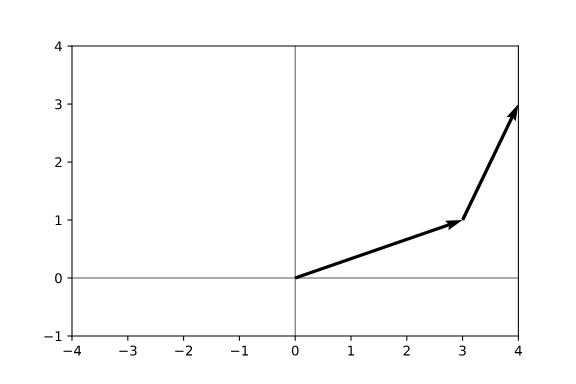

While the first vector starts at (0,0), the second vector starts at the point (3,1), where the first victor ended. If we add the resulting vector $begin{bmatrix} 4 \\  3 \end{bmatrix}$, we can see how the addition ties together:
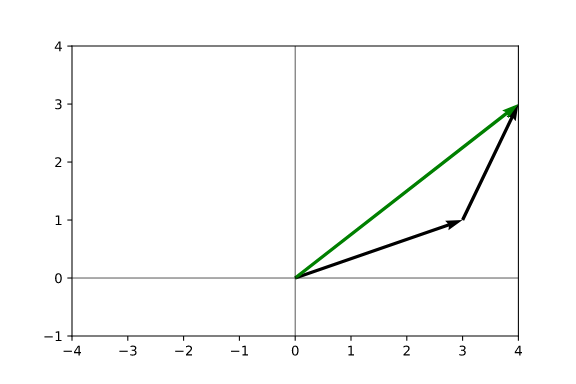

**Vector Subtraction**

Here's an example of vector subtraction, using the same 2 vectors:

$$\begin{bmatrix}
3\\ 
1
\end{bmatrix} - \begin{bmatrix}
1\\ 
2
\end{bmatrix} = 
\begin{bmatrix}
2\\ 
-1
\end{bmatrix}$$

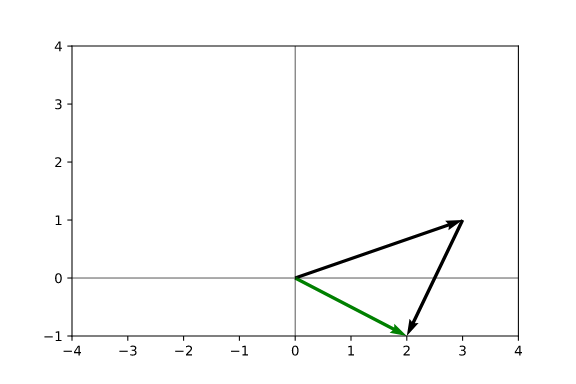

Instead of going up and to the right further (which is what happened when we added $[1,2])$, the second vector went down and to the left (because we're adding $[-1,-2])$. Note that we can only add or subtract vectors containing the same number of elements.

**Exercise**

- Plot the vector $\begin{bmatrix} 3\\ 0 \end{bmatrix}$. This vector should originate at (0,0).
- Plot the vector $\begin{bmatrix} 0\\ 3 \end{bmatrix}$. This vector should originate at (3,0).

- Add both of these vectors and plot the resulting vector. This vector should originate at (0,0). When calling `pyplot.quiver()`, use the `color` parameter to set the color to "green".

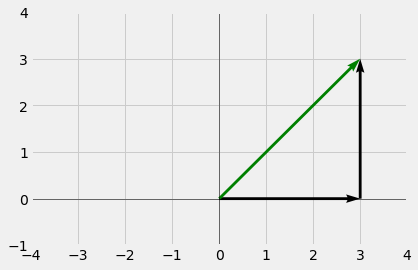

In [16]:
# This code draws the x and y axis as lines.

plt.axhline(0, c='black', lw=0.5)
plt.axvline(0, c='black', lw=0.5)
plt.xlim(-4,4)
plt.ylim(-1,4)

# Draw arrows
plt.quiver(0, 0, 3, 0, angles='xy', scale_units='xy', scale=1, color = 'black' )
plt.quiver(3, 0, 0, 3, angles='xy', scale_units='xy', scale=1, color = 'black' )
## Add vectors
plt.quiver(0, 0, 3, 3, angles='xy', scale_units='xy', scale=1, color = 'green' )
plt.show()

### Scaling Vectors

We can also scale vectors by multiplying or dividing by a scalar (a real number). When we do so, each element in the vector is multiplied or divided by the scalar:

$$3* \begin{bmatrix}
3\\
1
\end{bmatrix} =
\begin{bmatrix}
9\\
3
\end{bmatrix}$$

Between vector addition, vector subtraction, scalar multiplication, and scalar division, we can combine vectors in many different ways. Being able to combine vectors to create other vectors is a key idea in linear algebra. For example, we can combine the following vectors:
$$\begin{bmatrix}
3\\ 
1
\end{bmatrix}\begin{bmatrix}
1\\ 
0
\end{bmatrix}$$

using vector operations to try to obtain a another specific vector:
$$\begin{bmatrix}
3\\ 
1
\end{bmatrix}+ 3*\begin{bmatrix}
1\\ 
0
\end{bmatrix} = 
\begin{bmatrix}
6\\ 
1
\end{bmatrix}$$

**Exercise**

- Plot the vector $\begin{bmatrix} 3\\ 1 \end{bmatrix}$ This vector should originate at (0,0) and be colored `'blue'`.
- Plot the vector $\begin{bmatrix} 6\\ 2 \end{bmatrix}$ This vector should originate at (0,0) and be colored `'green'`.
- Plot the vector $\begin{bmatrix} 9\\ 3 \end{bmatrix}$ This vector should originate at (0,0) and be colored `'orange'`.

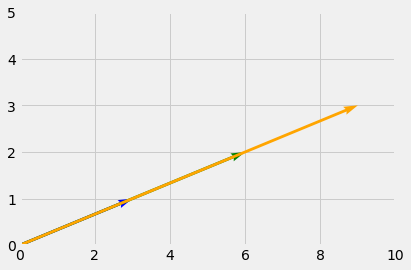

In [17]:
# This code draws the x and y axis as lines.

plt.axhline(0, c='black', lw=0.5)
plt.axvline(0, c='black', lw=0.5)
plt.xlim(0,10)
plt.ylim(0,5)

# plot vectors
plt.quiver(0, 0, 3,1, angles='xy', scale_units='xy', scale=1, color = 'blue' )
plt.quiver(0, 0,6,2, angles='xy', scale_units='xy', scale=1, color = 'green' )
plt.quiver(0, 0, 9, 3, angles='xy', scale_units='xy', scale=1, color = 'orange')
plt.show()

### Using Numpy for Vector Operations

Earlier, we used the `numpy.asarray()` function to represent a matrix:
```
matrix_one = np.asarray([
    [30, -1, -1000],
    [50, -1, -100]  
], dtype=np.float32)

array([[   30.,    -1., -1000.],
       [   50.,    -1.,  -100.]], dtype=float32)
```

To represent vectors in NumPy, we use the same function but we only specify a single value in each row. The following code creates a NumPy ndarray representation of the vector $\begin{bmatrix} 1 \\ 2 \\ 1 \end{bmatrix}$. we can use the + and the - operators to perform vector addition and subtraction. In addition, we can use the * operator to multiply a vector by a scalar quantity.



In [18]:
vector_test = np.asarray([
    [1],
    [2],
    [1]
], dtype = np.float32)
print(vector_test)

vector_test_two = 2*vector_test + 0.5*vector_test
print(vector_test_two)

[[1.]
 [2.]
 [1.]]
[[2.5]
 [5. ]
 [2.5]]


**Exercise**

- vector_one is given below.
- Assign the following vector to `vector_two`:$\begin{bmatrix} 3 \\ 0 \\ 1\end{bmatrix}$
- Multiply `vector_one` by 2, multiply `vector_two` by 5, and add both of the scaled vectors. Assign the resulting vector to `vector_linear_combination`.

In [19]:
vector_one = np.asarray([
    [1],
    [2],
    [1]
], dtype = np.float32)

vector_two = np.asarray([
    [3],
    [0],
    [1]
], dtype = np.float32)

vector_linear_combination = 2*vector_one + 5*vector_two
vector_linear_combination

array([[17.],
       [ 4.],
       [ 7.]], dtype=float32)

### Dot Product

The last critical vector operation is the dot product. Dot product is similar to multiplication, but involves multiplying the elements in the vectors in a specific way. Both of these vectors need to contain the same number of elements, a requirement the other operations we've learned so far have as well. To compute the dot product, we need to sum the products of the 2 values in each position in each vector:
$$\vec{a} * \vec{b} = \sum_{i=1}^{n} a_i b_i = a_1b_1 + a_2b_2 + ... + a_nb_n$$

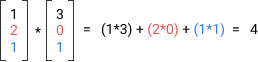

Unlike the other vector operations, the result of a dot product is a scalar value, not a vector. It is a critical operation in  multiplying a matrix and a vector together. To compute the dot product between 2 vectors, we need to use the `numpy.dot()` [function](https://numpy.org/doc/stable/reference/generated/numpy.dot.html). This function accepts 2 NumPy ndarray objects as the 2 required parameters. The main quirk is that one of the two vectors need to be represented as a row vector while the other a column vector:

```
vector_dp = np.dot(vector_one[:,0], vector_two)
```

In [20]:
vector_one = np.asarray([
    [1],
    [2],
    [1]
], dtype=np.float32)

vector_two = np.asarray([
    [3],
    [0],
    [1]
], dtype=np.float32)

dot_product = np.dot(vector_one[:,0], vector_two)
print(dot_product)

[4.]


### Linear Combination
We saw above, that we can multiply vectors by a scalar value and combine vectors using vector addition and vector subtraction. Using these operations, we can determine if a certain vector can be obtained by combining other vectors. For example, we may want to know if we can combine the vectors $\begin{bmatrix} 3\\ 1 \end{bmatrix}$ and $\begin{bmatrix} 1\\ 2 \end{bmatrix}$ to obtain the vector $\begin{bmatrix} 4\\ -2 \end{bmatrix}$, or mathematically:
$$c_1 \begin{bmatrix} 3\\ 1 \end{bmatrix} + c_2 \begin{bmatrix} 1\\ 2 \end{bmatrix}  = \begin{bmatrix} 4\\ -2 \end{bmatrix}$$

In the above formula, c1 and c2 represent constant variables. We're interested in knowing if there is a c1 and a c2 where this equation is true. Said another way, we're looking for a **solution** to this equation. Here's what that problem looks like visually, assuming only integer values for the constants:

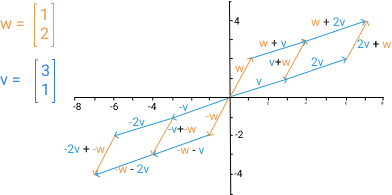

Being able to scale vectors using scalar multiplication then adding or subtracting these scaled vectors is known as **linear combination**. This concept is crucial to being able to apply linear algebra to solve useful problems. Using the concept of linear combination, we can rephrase our problem to the following: Is $\begin{bmatrix} 4\\ -2 \end{bmatrix}$ a linear combination of the vectors $\begin{bmatrix} 1\\ 2 \end{bmatrix}$ and $\begin{bmatrix} 3\\ 1 \end{bmatrix}$

Here's a visualization which shows the solution:
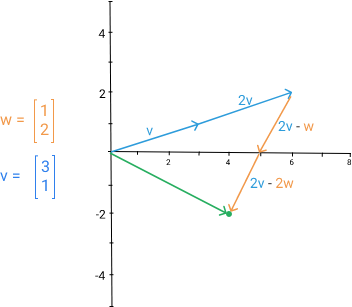

**Exercise**

- Assign the vector $\begin{bmatrix} 1\\ 2 \end{bmatrix}$ `w`
- Assign the vector $\begin{bmatrix} 3\\ 1 \end{bmatrix}$ to `v`
- Multiply `v` by 2 and subtract 2 times `w` and assign the result to end_point.

In [21]:
w = np.asarray([
    [1],
    [2]
], dtype = np.float32)

v = np.asarray([
    [3],
    [1]
], dtype = np.float32)

end_point = 2*v - 2*w
print(end_point)

[[ 4.]
 [-2.]]


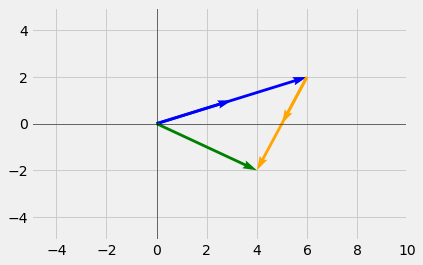

In [22]:
# plot x and y axis
plt.axhline(0, c='black', lw=0.5)
plt.axvline(0, c='black', lw=0.5)
plt.xlim(-5,10)
plt.ylim(-5,5)

# plot solution of linear combination
plt.quiver(0, 0, 3,1, angles='xy', scale_units='xy', scale=1, color = 'blue')
plt.quiver(0, 0, 6,2, angles='xy', scale_units='xy', scale=1, color = 'blue')
plt.quiver(6, 2, -1,-2, angles='xy', scale_units='xy', scale=1, color = 'orange')
plt.quiver(6, 2, -2,-4, angles='xy', scale_units='xy', scale=1, color = 'orange')
plt.quiver(0, 0, 4,-2, angles='xy', scale_units='xy', scale=1, color = 'green')
plt.show()


### Linear Combination and Vectors

Earlier we solved the **optimal salary problem**. We represented the first offer using the linear function `y=1000+30x` and the second offer using the linear function `y=100+50x`. We rewrote these functions in general form. Here's what the functions look like in general form:

$$30x - y = -1000$$
$$50x - y = -100$$

To represent both linear functions in a system, we used the following augmented matrix:

$$\left[\begin{array}{rr|r}
30 & -1 & -1000 \\ 
50 & -1 & -100
\end{array}\right]$$

We can now link this augmented matrix to the linear combination of vectors idea:

We want to know if $\begin{bmatrix} -1000\\ -100 \end{bmatrix}$ s a linear combination of the vectors $\begin{bmatrix} 30\\ 50 \end{bmatrix}$ and $\begin{bmatrix} -1\\ -1 \end{bmatrix}$

To find the solution to this system, we need to find the constants x and y where the following equation is true:
$$x \begin{bmatrix} 30\\ 50 \end{bmatrix} + y \begin{bmatrix} -1\\ -1 \end{bmatrix} = \begin{bmatrix} -1000\\ -100 \end{bmatrix}$$
Earlier, we solved the augmented matrix by using row operations to obtain the following form:
$$\left[\begin{array}{rr|r}
1 & 0 & x\\ 
0 & 1 & y
\end{array}\right]$$

### The Matrix Equation

The **matrix equation** is the representation of a linear system using only matrices and vectors. Here's the augmented matrix we started out with:
$$\left[\begin{array}{rr|r}
30 & -1 & -1000 \\ 
50 & -1 & -100
\end{array}\right]$$

This augmented matrix is a shorthand representation for the matrix equation:

$$\left[\begin{array}{rr|r}
30 & -1 \\ 
50 & -1 
\end{array}\right] \begin{bmatrix} x\\ y \end{bmatrix} =  \begin{bmatrix} -1000\\ -100 \end{bmatrix}$$

On the left side, we're multiplying a matrix containing the coefficients with the vector containing the variables. The right side contains the constant values. This separation of coefficients and variables from the constants should be familiar. This is exactly what we did in the general form as well!

t's common practice to use x1, x2,...xn instead of x and y to represent the individual values in the solution vector.

$$\left[\begin{array}{rr|r}
30 & -1 \\ 
50 & -1 
\end{array}\right] \begin{bmatrix} x_1\\ x_2 \end{bmatrix} =  \begin{bmatrix} -1000\\ -100 \end{bmatrix}$$

This allows us to work with vectors with any number of elements (instead of just 26, for the number of letters in the English alphabet). We can now introduce the arithmetic representation of the matrix equation:
$$A\vec{x} = \vec{b}$$
where A represents the coefficient matrix,  
→
x
  represents the solution vector, and  
→
b
  represents the constants. 

Note that  
→
b
  can't be a vector containing all zeroes, also known as the zero factor and represented using  
→
0

Before we can work with this form of the system, we need to learn about the following topics:
- the rules that describe how matrices can be combined
- how to multipy a matrix with a vector
- how to calculate the solution vector x without using Gaussian elimination..


-----
## Sec-3 - Matrix Algebra

Like vectors, matrices have their own set of algebraic operations. In this section, we'll learn the core matrix operations and build up to using some of them to solve the matrix equation.We will start with matrix addition and subtraction. 

A matrix consists of one or more column vectors.
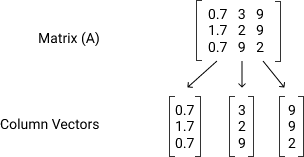



Because of that, the operations from vectors also carry over to matrices. We could perform vector addition and subtraction between vectors with the same number of rows. We can perform matrix addition and subtraction between matrices containing the same number of rows and columns.

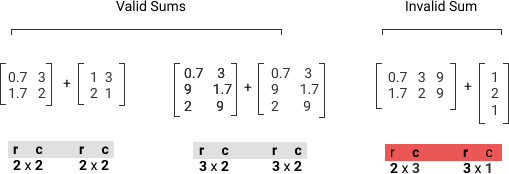


As with vectors, matrix addition and subtraction works by distributing the operations across the specific elements and combining them.
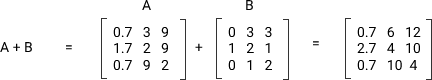


Lastly, we can also multiply a matrix by a scalar value, just like we can with a vector.

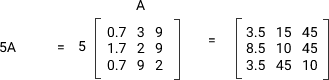



### Matrix-Vector Multiplication
The matrix equation we discussed briefly in the last mission is an example of matrix-vector multiplication. When we multiply a matrix by a vector, we are essentially combining each row in the matrix with the column vector.

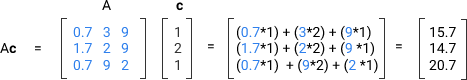



To multiply a matrix by a vector, the number of columns in the matrix needs to match the number of rows in the vector.

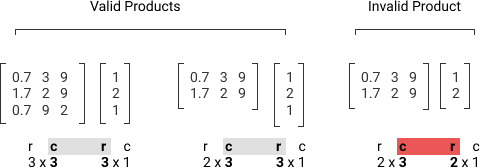

To multiply a matrix with a vector in NumPy, we need to use the `numpy.dot()` [function](https://numpy.org/doc/stable/reference/generated/numpy.dot.html).


**Exercise**

- Assign the following matrix to a NumPy array named `matrix_a`:
$$\begin{bmatrix} 0.7 & 3 & 9 \\ 1.7 & 2 & 9 \\ 0.7 & 9 & 2 \end{bmatrix}$$

= Assign the following vector to a NumPy array named `vector_b`:
$$\begin{bmatrix} 1 \\ 2 \\ 1\end{bmatrix}$$

- Use numpy.dot() to multiply `matrix_a` with `vector_b`. Assign to `ab_product` and display using the print() function.

In [24]:
matrix_a = np.asarray([
    [0.7, 3, 9],
    [1.7, 2, 9],
    [0.7, 9, 2]
], dtype = np.float32)

vector_b = np.asarray([
    [1],
    [2],
    [1]
], dtype = np.float32)
ab_product = np.dot(matrix_a, vector_b)
ab_product

array([[15.7],
       [14.7],
       [20.7]], dtype=float32)

### Matrix Multiplication
Because a matrix consists of column vectors, we can extend what we learned about matrix vector multiplication to multiply matrices together. In matrix vector multiplication, we performed a dot product between each row in the matrix and the column vector. In matrix multiplication, we extend this to perform a dot product between each row in the first matrix and each column in the second matrix.

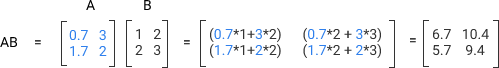$$


As with matrix vector multiplication, the columns in the first matrix need to match the number of rows in the second matrix.
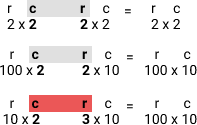



Note that the order of multiplication also matters.
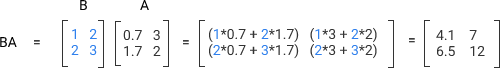

**Exercise**

- Multiply `matrix_a` by `matrix_b` and assign to `product_ab`.
- Multiply `matrix_b` by `matrix_a` and assign to `product_ba`
- Display to determine differences

In [25]:
matrix_a = np.asarray([
    [0.7, 3],
    [1.7, 2],
    [0.7, 9]
], dtype=np.float32)

matrix_b = np.asarray([
    [113, 3, 10],
    [1, 0, 1],
], dtype=np.float32)

product_ab = np.dot(matrix_a, matrix_b)
print(product_ab)
product_ba = np.dot(matrix_b, matrix_a)
print(product_ba)

[[ 82.1         2.1        10.       ]
 [194.1         5.1000004  19.       ]
 [ 88.1         2.1        16.       ]]
[[ 91.2 435. ]
 [  1.4  12. ]]


### Matrix Transpose

The transpose of a matrix switches the rows and columns of a matrix. You can think of the transpose operation as a rotation. In data science, we're often working with data tables of different dimensions. Because of the requirements for matrix multiplication, we sometimes want to take the transpose of a matrix to allow us to multiply matrices together that, by default, don't overlap in number of rows and columns.

Mathematically, we use the notation $A^T$ to to specify the transpose operation
$$A^T + B^T = C$$
The transpose has a few different interesting rules that are a bit intuitive. For example, when taking the transpose of the sum of two matrices, we can distribute the transpose operation to each matrix:

$$(A+B)^T = A^T + B^T$$

One counterintuitive rule is when we take the transpose of the product of 2 matrices:
$$(AB)^T = B^TA^T$$
 To compute the transpose of a NumPy ndarray, we need to use the `numpy.transpose()` [function](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.transpose.html).

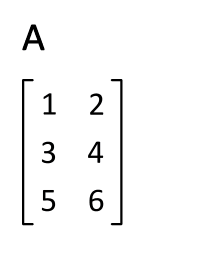

In [29]:
a_transpose = np.asarray([
    [1, 3, 5],
    [2, 4, 6]
])
a = np.transpose(a_transpose)
a_transpose = np.transpose(a)
print(a)
print(a_transpose)

[[1 2]
 [3 4]
 [5 6]]
[[1 3 5]
 [2 4 6]]


**Exercise**

For the given matrices:
- Compute the transpose of `matrix_a` and assign to `transpose_a`. Display `transpose_a` 
- Compute the transpose of `transpose_a` and display it using the `print()` function. Does this match the original matrix, `matrix_a`?
- Multiply the transpose of `matrix_b` with the transpose of `matrix_a` (in that order) and assign to `trans_ba`: BTAT
- Multiply the transpose of`matrix_a` with the transpose of `matrix_b` (in that order) and assign to `trans_ab`: ATBT
- Multiply `matrix_a` and `matrix_b` and assign the product to `product_ab`. Compute the transpose of `product_ab`, (AB)T and display the result 
- Confirm  that the transpose of `product_ab` is the same as `trans_ba`

In [40]:
matrix_a = np.asarray([
    [0.7, 3],
    [1.7, 2],
    [0.7, 9]
], dtype=np.float32)

matrix_b = np.asarray([
    [113, 3, 10],
    [1, 0, 1],
], dtype=np.float32)

transpose_a = np.transpose(matrix_a)
print(transpose_a)
transpose_transpose_a = np.transpose(transpose_a)
print(transpose_transpose_a)

transpose_b = np.transpose(matrix_b) 

trans_ba = np.dot(transpose_b, transpose_a)
trans_ab = np.dot(transpose_a, transpose_b)
product_ab = np.dot(matrix_a, matrix_b)
np.transpose(product_ab) == trans_ba





[[0.7 1.7 0.7]
 [3.  2.  9. ]]
[[0.7 3. ]
 [1.7 2. ]
 [0.7 9. ]]


array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

### Identity Matrix

In the matrix equation that we discussed in the last mission, we're trying to solve for the vector → x. 
$A\vec{x} = \vec{b}$

Right now, the matrix A multiplies the vector →x  and we need a way to cancel A.

the identity matrix contains 1 along the diagonals and 0 elsewhere. Here's what the 2x2 identity matrix looks like, often represented symbolically using I2:
$$I_2 = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$$

When we multiply I2 with any vector containing 2 elements, the resulting vector matches the original vector exactly:

$$I_2 \vec{x} = \vec{x}$$

This is because each element in the vector is multiplied exactly once by the diagonal 1 value in the identity matrix:

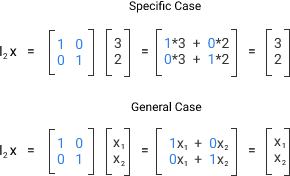

If we can transform matrix A and convert it into the identity matrix, then only the solution vector will remain i.e.→x. 

We can create any In identity matrix using the `numpy.identity()` [function](https://numpy.org/doc/stable/reference/generated/numpy.identity.html). This function only has 1 required parameter, `n`, which specifies the `n x n` identity matrix we want.


**Exercise**

- Create I2 and assign to `i_2`.
- Create I3 and assign to `i_3`.
- Create a 3 x 3 matrix and assign to `matrix_33`.
- Create a 2 x 3 matrix and assign to `matrix_23`.
- Multiply `i_3` with `matrix_33` and assign to `identity_33`.
- Multiply `i_2` with `matrix_23` and assign to `identity_23`.
We should expect `identity_33` to match `matrix_33` and `identity_23` to match` matrix_23`.
 

In [45]:
i_2 = np.identity(2)
i_3 = np.identity(3)
matrix_33 = np.asarray([
    [0, 1, 2],
    [3, 4, 5],
    [6,7,8]
],dtype = np.float32)
matrix_23 = np.asarray([
    [0, 1, 2],
    [3, 4, 5]
],dtype = np.float32)
identity_33 = np.dot(i_3, matrix_33)
identity_23 = np.dot(i_2, matrix_23)
print(identity_33 == matrix_33)
print(identity_23 == matrix_23)

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
[[ True  True  True]
 [ True  True  True]]


### Matrix Inverse

In order to cancel the coefficient matrix A, or in other words, we want to transform A into the identity matrix I. Multiplying the inverse of a matrix by the matrix accomplishes this task. The matrix inverse is similar to the idea of the multiplicative inverse. For example, let's say we want to solve for x in the equation 5x=10. To do so, we need to multiply both sides by the multiplicative inverse of 5, which is: 1/5. $5^{-1}*5x = 5^{-1}*10$

For the matrix equation, we need to multiply both sides by the inverse of A:
$$A^{-1}A\vec{x} = A^{-1}\vec{b}$$

$\vec{x} = A^{-1}\vec{b}$

While we use the matrix inverse to cancel out specific terms in the same fashion as the multiplicative inverse, the calculation is completely different. Let's understand the calculation for the inverse of a 2x2 matrix.

$$A =  \begin{bmatrix} a & b \\ c & d \end{bmatrix}$$ 

then 
$$A^{-1} = \frac{1}{ad - bc} \begin{bmatrix} d & -b \\ -c & a \end{bmatrix}$$

The term ad−bc is known as the **determinant** and is often written as det(A)=ad−bc or as |A|=ad−bc. Because we're dividing by the determinant when calculating the matrix inverse, a **2 x 2 matrix is only invertible if the determinant is not equal to 0**.



**Exercise**

- Create a function named `matrix_inverse_two()` that accepts a 2 x 2 matrix, as a NumPy ndarray, and returns the matrix inverse.This function should first calculate the determinant of the matrix.
- If the determinant is equal to 0, an error should be returned.
- If the determinant is not equal to 0, this function should return the matrix inverse.
- Calculate the inverse of `matrix_a` using the function and assign the result to `inverse_a`.
- Multiply `inverse_a` with `matrix_a` and assign the result to i_2. Display i_2 using the print() function.

In [60]:
def matrix_inverse_two(m_2):
    """ Function to inverse a 2x2 matrix"""
    determinant = (m_2[0,0] * m_2[1,1] - m_2[0,1]*m_2[1,0])
    if determinant == 0:
        raise ValueError("Matrix not invertible")
    m_two_inv = np.asarray ([
        [m_2[1,1], -m_2[0,1]],
        [-m_2[1,0], m_2[0,0]]
                 ]) * 1/ determinant
    return m_two_inv
    

In [61]:
matrix_a = np.asarray([
    [1.5, 3],
    [1, 4]
])
inverse_a = matrix_inverse_two(matrix_a)
i_2 = np.dot(inverse_a, matrix_a)
i_2

array([[1., 0.],
       [0., 1.]])

### Solving the Matrix Equation

Now that we know how to compute the matrix inverse, we can solve our system using the matrix equation $A\vec{x} = \vec{b}$

$$\left[\begin{array}{rr|r}
30 & -1 \\ 
50 & -1 
\end{array}\right] \begin{bmatrix} x_1\\ x_2 \end{bmatrix} =  \begin{bmatrix} -1000\\ -100 \end{bmatrix}$$

$$\left[\begin{array}{rr|r}
30 & -1 \\ 
50 & -1 
\end{array}\right]^{-1} \left[\begin{array}{rr|r}
30 & -1 \\ 
50 & -1 
\end{array}\right] \begin{bmatrix} x_1\\ x_2 \end{bmatrix} =  \left[\begin{array}{rr|r}
30 & -1 \\ 
50 & -1 
\end{array}\right]^{-1} \begin{bmatrix} -1000\\ -100 \end{bmatrix}$$

$$\begin{bmatrix} x_1\\ x_2 \end{bmatrix} =  \left[\begin{array}{rr|r}
30 & -1 \\ 
50 & -1 
\end{array}\right]^{-1} \begin{bmatrix} -1000\\ -100 \end{bmatrix}$$

**Exercise**

Finish solving the equation and assign the solution vector →x to `solution_x`:
Display solution_x

In [63]:
a_2 = np.asarray([
    [30, -1],
    [50, -1]
], dtype = np.float32)
b = np.asarray([
    [-1000],
    [-100]
], dtype = np.float32)
solution_x = np.dot(matrix_inverse_two(a_2), b)
solution_x                    

array([[  45.],
       [2350.]], dtype=float32)

### Determinant for Higher Dimensions - Using Numpy

So far, we've mostly worked with matrices that contain the same number of rows and columns. These matrices are known as square matrices and **we can only compute the determinant and matrix inverse for square matrices**. In addition, **we can only compute the matrix inverse of a square matrix when the determinant is not equal to 0**.

To find the determinant of a higher dimensional square matrix, we need to use the more general form of the determinant. Here's what that looks like:

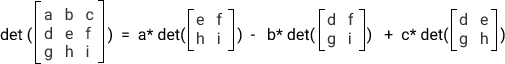

The determinant of a higher-dimensional system involves breaking down the full matrix into minor matrices. First, we select a row or column (most teaching materials select the first row). For the first value in that row, we "hide" the other values in that row (2nd and 3rd value in the row) and in that column (2nd and 3rd value in the column), select the rest of the elements as the minor matrix, and multiply the scalar value with the determinant of the minor matrix. We repeat this for the remaining values in the first row. This diagram helps illustrate this much clearer:

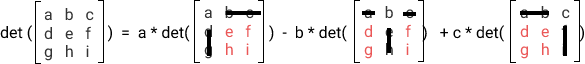

To compute the determinant in NumPy, we use the `numpy.linalg.det()` [function](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.linalg.det.html).


**Exercise**

Calculate the determinant of `matrix_22` and assign to `det_22`.
Calculate the determinant of `matrix_33` and assign to `det_33`.

In [64]:
matrix_22 = np.asarray([
    [8, 4],
    [4, 2]
])

matrix_33 = np.asarray([
    [1, 1, 1],
    [1, 1, 6],
    [7, 8, 9]
])

det_22 = np.linalg.det(matrix_22)
det_33 = np.linalg.det(matrix_33)

print(det_22, det_33)

0.0 -4.999999999999997


### Matrix Inverse for Higher Dimensions

To calculate the matrix inverse for a 3 by 3, or larger, matrix, we need to also work with the more general form of the matrix inverse equation. Similar to the determinant for higher-dimensional matrices, the matrix inverse works by generating minor matrices that are dependent on the position in the matrix. Here's a diagram describing the matrix inverse for a 3 by 3 matrix:

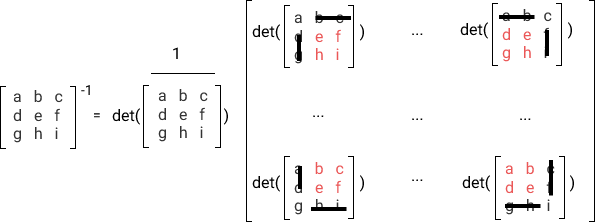

In numpy `numpy.linalg.inv()` [function](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.linalg.inv.html) can work with any n-dimensional square matrix.

In [71]:
matrix_22 = np.asarray([
    [6, 4],
    [4, 2]
])
matrix_33 = np.asarray([
    [1, 1, 1],
    [1, 1, 6],
    [7, 8, 9]
])
matrix_22_inv = np.linalg.inv(matrix_22)
print(matrix_22)
matrix_33_inv = np.linalg.inv(matrix_33)
print(matrix_33)  


[[6 4]
 [4 2]]
[[1 1 1]
 [1 1 6]
 [7 8 9]]


## Sec-4 - Solution Sets

So far,  we've explored two different ways to find the solution to $A\vec{x} = \vec{b}$  when b isn't a vector containing all zeroes (b≠0) ). The first way we explored was Gaussian elimination, which involves using the row operations to transform the augmented representation of a linear system to echelon form and then finally to reduced row echelon form. The second way we explored was to compute the matrix inverse of A and left multiplying both sides of the equation to find x.

While we can use these techniques to solve most of the linear systems we'll encounter, we need to learn what to do when:

- the solution set for a linear system doesn't exist
- the solution set for a linear system isn't just a single vector
- b is equal to 0 (null matrix)

### Inconsistent Systems
Not all systems of equations have a solution and these systems are inconsistent. An inconsistent system will have two or more equations that don't overlap in values, making it impossible to find a solution. Let's look at a concrete example:
$$\left[\begin{array}{rr|r}
8 & 4 & 5 \\ 
4 & 2 & 5
\end{array}\right]$$

Let's try to reduce this matrix to echelon form. We can divide the first row by two:

$$\left[\begin{array}{rr|r}
4 & 2 & 2.5 \\ 
4 & 2 & 5
\end{array}\right]$$

If we subtract the top row from the bottom row (R2 - R1) and divide the first row by 4 (R1 / 4), the augmented matrix ends up with zeroes for the coefficients in R2:

$$\left[\begin{array}{rr|r}
1 & 1/2 & 0.625 \\ 
0 & 0 & 2.5
\end{array}\right]$$

**Exercise**

- Extract the equations from the augmented matrix $\left[\begin{array}{rr|r}
8 & 4 & 5 \\ 
4 & 2 & 5
\end{array}\right]$ and rewrite them in slope-intercept form: y=mx+b

- Use `numpy.linspace(`) to generate 1000, evenly spaced values between 0 and 20 and assign to `x`.
- Transform x using the first equation and assign the result to `y1`
- Transform x using the second equation and assign the result to `y2`

- Generate 2 line plots on the same subplot, setting the line color of both to "blue":
    - One with `x` on the x-axis and `y1` on the y-axis.
    - One with `x` on the x-axis and `y2` on the y-axis.
- Skip selecting a value range for the `x` and `y` axes, and instead let matplotlib automatically select based on the data.

**Rewriting Equations**

8x + 4y = 5
y = (-8x + 5)/4
y = -2x + 5/4

4x + 2y = 5
y = (-4x + 5)/2
y = -2x + 5/2

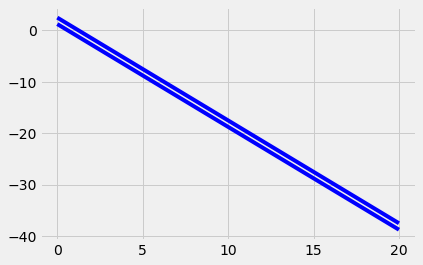

In [73]:
x = np.linspace(0, 20, 1000)
y1 = -2*x + 5/4
y2 = -2*x + 5/2

plt.plot(x, y1, c= 'blue')
plt.plot(x, y2, c = 'blue')
plt.show()

### Singular Matrix

From the plot of the linear system, we can tell that the linear system has no solution because both of the lines are parallel and don't intersect. Because both equations have the same slope (−2) but different y-intercept values (5/2 and 5/4), this should match our intuition. While we can plot the equations when working with only 2 variables to determine that no solution exists, we need a more general way that builds on what we've learned in linear algebra. Let's first discuss how to handle this for square matrices.

Earlier, we learned about the matrix inverse, and how the inverse only exists if the determinant of the matrix is not equal to 0. When we're working with a square matrix, one where the number of rows and the number of columns are equal, we can compute the determinant and if it's equal to 0 then we say that the matrix is **singular**, or contains no inverse.

If we calculate the determinant of the coefficient matrix from the last step, we can tell that the matrix is singular and the linear system doesn't contain a solution.

In [74]:
matrix_singular = np.asarray([
    [8, 4],
    [4, 2]
])
print(np.linalg.det(matrix_singular))

0.0


### Solution Sets

So far, we've only looked at linear systems where the constants vector (b) doesn't contain all zeroes. These linear systems are known as **nonhomogenous systems**. Here's the nonhomogenous system from earlier:

$$\left[\begin{array}{rr|r}
8 & 4 & 5 \\ 
4 & 2 & 5
\end{array}\right]$$

On the other hand, when the constant vector is equal to the zero vector, that system is known as a **homogenous system**. Here's an example:

$$\left[\begin{array}{rr|r}
8 & 4 & 0 \\ 
4 & 2 & 0
\end{array}\right]$$

The distinction exists because homogenous systems **always have a solution**, the zero vector.

**Square, Nonhomogenous System**

For square, **nonhomogenous systems**, there are 3 possible solutions:

- no solution
- a single solution
- infinitely many solutions
Here's a diagram that compares the 3 different possible solutions in a simple, 2D nonhomogenous linear system. These ideas extend past 2 dimensions, but it's easier to build intuition in 2 dimensions.

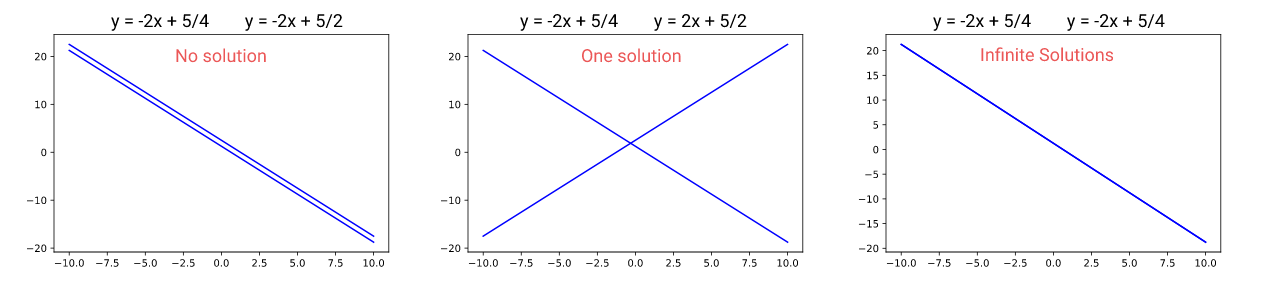

**Rectangular, Nonhomogenous System**

For a rectangular (nonsquare), nonhomogenous systems, there are 2 possible solutions:

- no solution
- infinitely many solutions
Let's look at a higher dimensional example:

$$\left[\begin{array}{rrr|r}
1 & 0 & 3 & 1\\ 
1 & 2 & 1 & 2
\end{array}\right]$$

The second step is to divide row 2 by 2 (R2/2):

$$\left[\begin{array}{rrr|r}
1 & 0 & 3 & 1\\ 
0 & 1 & -1 & 1/2
\end{array}\right]$$

If we convert this system back to equation form, we get the following system:

$$x_1 + 3x_3 = 1 \\ 
x_2 - x_3 = 1/2$$

If we solve for each variable, we get the following solution:

$$x_1 = 1 - 3x_3 \\ 
x_2 = 1/2 + x_3$$

x3 is known as a **free variable**, because it's allowed to vary freely. We can notice that both x1 and x2 are expressed in terms of x3. **This system has infinitely many solutions**, because for any real number we plug in for x3, we'll get different values for x1 and x2. Said another way, there are infinite solutions to this system because there's an infinite number of values that x3 could be that make this system true. This set of infinite solutions is known as a **solution space**.

### Homogenous Systems

We can solve any homogenous system, $A\vec{x} = 0$ by setting x to the zero vector →0. This is known as the **trivial solution**, since it isn't a particularly useful solution for us. For homogenous systems, we're interested in determining if infinitely many solutions exist or not. Let's look at a concrete example:

$$\left[\begin{array}{rrr|r}
6 & 10 & -8 & 0\\ 
-6 & -4 & 8 & 0 \\
3 & 1/2 & -4 & 0
\end{array}\right]$$

After standard row reduction to echelon form, here's what the matrix looks like:
$$\left[\begin{array}{rrr|r}
3 & 5 & -4 & 0\\ 
0 & 3 & 0 & 0 \\
0 & 0 & 0 & 0
\end{array}\right]$$

Interestingly, the last row is the equation 0=0. If the last row contained an untrue equation like 0=3, then the system has no solution. For this system, however, we can continue reducing to find the solution space. We eventually get to the following matrix:

$$\left[\begin{array}{rrr|r}
1 & 0 & -4/3 & 0\\ 
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0
\end{array}\right]$$

If we convert this to equation form, we get:
$$x_1 - \frac{4}{3} x_3 = 0 \\
x_2 = 0$$

In this system, x3 is a free variable, $x_1 = \frac{4}{3}x_3$ and x2=0. Changing x3 leads to a different, valid solution. Because x3 can be any real number (of which there are an infinite amount), we can find an infinite number of solutions to the system.

When the solution is a solution space (and not just a unique set of values), it's common to rewrite it into **parametric vector** form. Here's what that looks like:

$$\vec{x} = x_3\cdot \begin{bmatrix}
4/3\\
0 \\
1
\end{bmatrix}$$

The parametric vector form of the solution space makes the infinite nature of the solution space more apparent.

**Exercise**

Create a function named `test_homog()` that accepts a single parameter: `x3`.
- This function should first use the parameter value to calculate `x1` and `x2`using the solution functions calculated above and assign to `x1` and `x2`.
- Then, this function should plug in `x1`, `x2`, and `x3` into the original linear system (use the echelon form instead for compactness) and return `True` if both equations are true and `False` otherwise. We'll need to convert the initial, augmented matrix representation of the system to standard form by hand first.
- Use the `test_homog()` function to see if setting `x3` to 1 returns `True`. Assign the result of the function to `b_one`.
- Use the `test_homog()` function to see if setting `x3` to -10 returns `True`. Assign the result of the function to `b_two`.

In [76]:
def test_homog(x3):
    x1 = float(4/3*x3)
    x2 = 0
    return((3*x1 + 5*x2 - 4*x3 == 0) and (x2 == 0))

b_one = test_homog(1)
b_two = test_homog(-10)
print(b_one, b_two)

True True


### Summary - Linear Systems

In this course, we've explored a few different ways to classify linear systems.

**Square vs. Rectangular**

When A is a square matrix, we can compute the determinant to determine if there's a solution and the matrix inverse if the determinant isn't equal to 0. Unfortunately, computing the determinant and matrix inverse are very computationally intensive and should only be used for low dimensional matrices. These techniques are incredibly useful when working with small linear systems by hand, however.

When A is a rectangular matrix, we're looking to determine if the system has no solutions or infinitely many solutions using Gaussian elimination. If the latter, it's common to express the solution space in parametric vector form.

**Nonhomogenous vs. Homogenous**

When A is nonhomogenous, the linear system can contain zero, one, or infinitely many solutions. However, if A is rectangular and nonhomogenous, it can't contain just a unique solution (there will always be a free variable).

When A is homogenous, the linear system always contains the trivial solution (the zero vector). To determine if there's a solution space, we need to use Gaussian elimination to see if there are any inconsistent equations. If not, we can express the solution space in parametric form using the free variable.